In [1]:
import numpy as np
import matplotlib.pyplot as plt

import h5py

In [2]:
from cycler import cycler

def load_plotting_setting():
    cmap = plt.colormaps.get_cmap('viridis')
    colors = cmap(np.linspace(0, 0.95, 5))

    default_cycler = cycler(color=colors)
    
    params = {'figure.figsize': (7, 5),
              'axes.prop_cycle': default_cycler,
              'axes.titlesize': 14,
              'legend.fontsize': 12,
              'axes.labelsize': 14,
              'axes.titlesize': 14,
              'xtick.labelsize': 12,
              'ytick.labelsize': 12,
              'xtick.direction': 'in',
              'ytick.direction': 'in',
              'xtick.top': True,
              'ytick.right': True
              }
    plt.rcParams.update(params)

load_plotting_setting()

In [3]:
def get_disp_timestream(file, channels=['d']):
    timestreams = []
    with h5py.File(file, 'r') as f:
        dt = f['data'].attrs['delta_t']

        for channel in channels:
            _ = f['data'][f'channel_{channel}'][:] * f['data'][f'channel_{channel}'].attrs['adc2mv'] / 1000
            timestreams.append(_)
        f.close()

    return dt, timestreams


In [21]:
from scipy.signal import butter, sosfilt

def demodulate(_sig, _lo, f_samp, f_lp):
    mixed_sig = _sig * _lo

    sos = butter(N=8, Wn=f_lp, btype='lowpass', output='sos', fs=f_samp)
    filtered = sosfilt(sos, mixed_sig)
    
    return filtered

def get_eb_comp(file):
    dt, trace = get_disp_timestream(file, ['d', 'g'])
    fs = int(1 / dt)  # Sample frequency

    ee = demodulate(trace[0], trace[1], fs, 10)
    bb = demodulate(trace[0], np.gradient(trace[1]), fs, 10)

    return ee, bb

#### Use demodulation to extract in-phase and out-of-phase signal

In [22]:
data_dir = r'/Volumes/LaCie/lorentz_force/sphere_20250708/20250725_2e-8mbar'

file_nob_0   = rf'{data_dir}/20250725_minus130e_e149khz_2_5vpp_0.hdf5'
file_b_0     = rf'{data_dir}/20250725_minus130e_e149khz_2_5vpp_3a_0.hdf5'
file_b_inv_0 = rf'{data_dir}/20250725_minus130e_e149khz_2_5vpp_3a_inv_0.hdf5'

file_nob_1   = rf'{data_dir}/20250725_minus130e_e149khz_2_5vpp_1.hdf5'
file_b_1     = rf'{data_dir}/20250725_minus130e_e149khz_2_5vpp_3a_1.hdf5'
file_b_inv_1 = rf'{data_dir}/20250725_minus130e_e149khz_2_5vpp_3a_inv_1.hdf5'

In [23]:
ees, bbs = [], []
for file in [file_nob_0, file_nob_1, file_b_0, file_b_1, file_b_inv_0, file_b_inv_1]:
    ee, bb = get_eb_comp(file)
    ees.append(ee)
    bbs.append(bb)

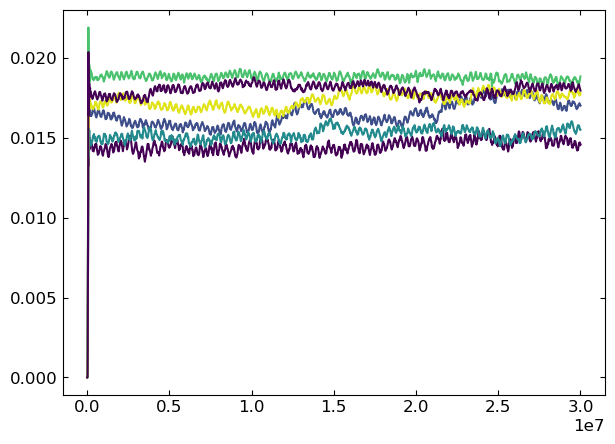

In [24]:
for i in range(6):
    plt.plot(ees[i])

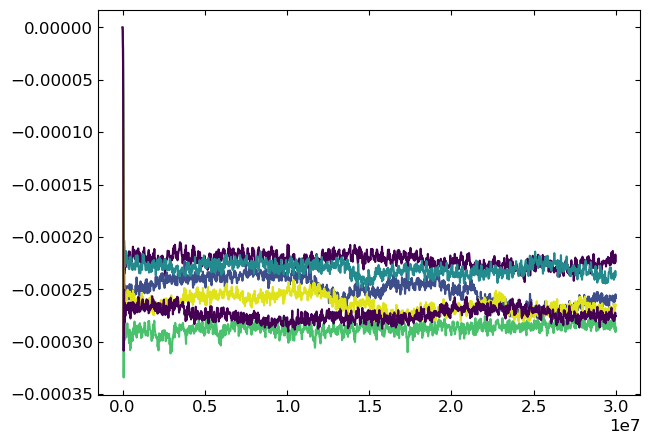

In [25]:
for i in range(6):
    plt.plot(bbs[i])